# Importando a planilha de dados

In [1]:
import pandas as pd
from numpy import nan as NA
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.4f}'.format

df_orders = pd.read_excel('sample.xls', sheet_name='Orders')
df_returns = pd.read_excel('sample.xls', sheet_name='Returns')

# Data Frame original de pedidos 
print(df_orders)
# Data Frame original de pedidos retornados
print(df_returns)

# Junção dos dois Data Frames
df_merged = pd.merge(df_orders,df_returns, on='Order ID', how='left')

# Identificação com '0' dos pedidos que não foram retornados
df_merged['Returned'].fillna(0,inplace=True)

# Identificação com '1' dos pedidos que foram retornados
df_merged['Returned'].replace("Yes",1, inplace=True)

# Identificação do ano da realização do pedido
df_merged['_Order_Date_Year'] = pd.DatetimeIndex(df_merged['Order Date']).year

# Identificação do mês da realização do pedido
df_merged['_Order_Date_Month'] = pd.DatetimeIndex(df_merged['Order Date']).month

# Identificação do tempo gasto para envio do pedido
df_merged['_Ship_Time'] = df_merged['Ship Date'] - df_merged['Order Date']

# Identificação do tempo gasto para envio do pedido
df_merged['_Unit_Price'] = df_merged['Sales'] / df_merged['Quantity']

# Data Frame resultados dos tratamentos iniciais dos dados
print(df_merged)

      Row ID        Order ID Order Date  ... Quantity Discount    Profit
0          1  CA-2016-152156 2016-11-08  ...        2   0.0000   41.9136
1          2  CA-2016-152156 2016-11-08  ...        3   0.0000  219.5820
2          3  CA-2016-138688 2016-06-12  ...        2   0.0000    6.8714
3          4  US-2015-108966 2015-10-11  ...        5   0.4500 -383.0310
4          5  US-2015-108966 2015-10-11  ...        2   0.2000    2.5164
...      ...             ...        ...  ...      ...      ...       ...
9989    9990  CA-2014-110422 2014-01-21  ...        3   0.2000    4.1028
9990    9991  CA-2017-121258 2017-02-26  ...        2   0.0000   15.6332
9991    9992  CA-2017-121258 2017-02-26  ...        2   0.2000   19.3932
9992    9993  CA-2017-121258 2017-02-26  ...        4   0.0000   13.3200
9993    9994  CA-2017-119914 2017-05-04  ...        2   0.0000   72.9480

[9994 rows x 21 columns]
    Returned        Order ID
0        Yes  CA-2017-153822
1        Yes  CA-2017-129707
2        Ye

# Informações preliminares sobre o DataFrame

In [2]:
#Quantidade de linhas e colunas do DataFrame
print(f'Quantidade de linhas e colunas: {df_merged.shape}\n')

#Informações básicas sobre as variáveis quantitativas
print('Métricas das variáveis quantitativas:')
print(df_merged[['Sales','Quantity', 'Discount', 'Profit', '_Ship_Time']].describe())

Quantidade de linhas e colunas: (9994, 26)

Métricas das variáveis quantitativas:
           Sales  Quantity  Discount     Profit                 _Ship_Time
count  9994.0000 9994.0000 9994.0000  9994.0000                       9994
mean    229.8580    3.7896    0.1562    28.6569  3 days 22:59:46.311787072
std     623.2451    2.2251    0.2065   234.2601  1 days 17:56:29.766161104
min       0.4440    1.0000    0.0000 -6599.9780            0 days 00:00:00
25%      17.2800    2.0000    0.0000     1.7288            3 days 00:00:00
50%      54.4900    3.0000    0.2000     8.6665            4 days 00:00:00
75%     209.9400    5.0000    0.2000    29.3640            5 days 00:00:00
max   22638.4800   14.0000    0.8000  8399.9760            7 days 00:00:00


**Observação 1:** Investigar a variável "Profit", uma vez que apresenta um valor mínimo muito baixo. Indicando prejuízo acentuado, em determinados casos.

**Observação 2:** Investigar a variável "Profit", uma vez que apresenta valor do segundo quartil muito baixo. Indicando possível baixo lucro, em até 50% dos 2 casos.

**Observação 3:** Investigar a variável "_Ship_Time", uma vez que 7 dias para envio de um pedido pode não ser razoável para o mercado.

# Tratamento de dados nulos ou sem informação

In [3]:
#Contagem de ausência de dados
print('\nContagem de ausência de dados:\n')
print(df_merged.isna().any())

df_merged_cleaned = df_merged.dropna()


Contagem de ausência de dados:

Row ID               False
Order ID             False
Order Date           False
Ship Date            False
Ship Mode            False
Customer ID          False
Customer Name        False
Segment              False
Country              False
City                 False
State                False
Postal Code          False
Region               False
Product ID           False
Category             False
Sub-Category         False
Product Name         False
Sales                False
Quantity             False
Discount             False
Profit               False
Returned             False
_Order_Date_Year     False
_Order_Date_Month    False
_Ship_Time           False
_Unit_Price          False
dtype: bool


**Observação 4:** Verificamos que não há ausência de dados em nosso DataFrame.

# Análises dos subitens dos pedidos

Verificação da relação entre o valor da venda e o lucro, além da relação entre o percentual de desconto fornecido e o lucro obtido.

Text(0.5, 1.0, 'Discount X Profit')

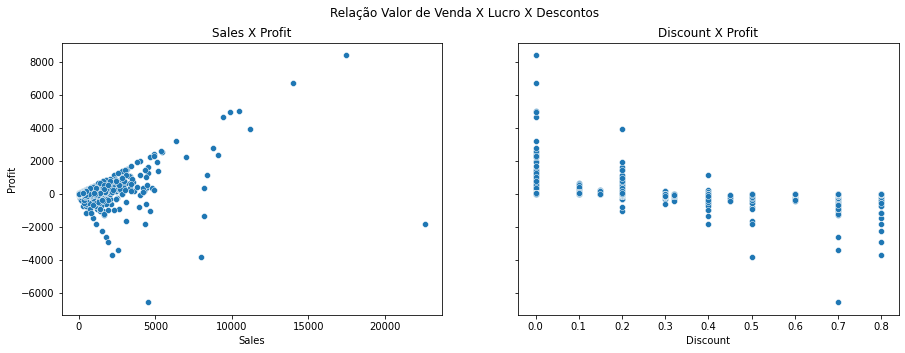

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Relação Valor de Venda X Lucro X Descontos ')

sns.scatterplot(ax=axes[0], x='Sales', y='Profit', data=df_merged_cleaned);
axes[0].set_title('Sales X Profit')
sns.scatterplot(ax=axes[1], x='Discount', y='Profit', data=df_merged_cleaned);
axes[1].set_title('Discount X Profit')

**Hipótese 1:** Conforme já informado na Observação 1, verificamos uma anomalia com relação ao lucro da empresa em determinadas situações. Observe no gráfico à esquerda que em muitos casos ocorre lucro negativo. Já no gráfico à direita, aparentemente, quando ampliamos a oferta do valor de descontos, principalmente acima de 20%, temos um lucro tendendo a ser negativo.

Produtos 

Text(0.5, 1.0, 'Top 10 - Produtos menos lucrativos')

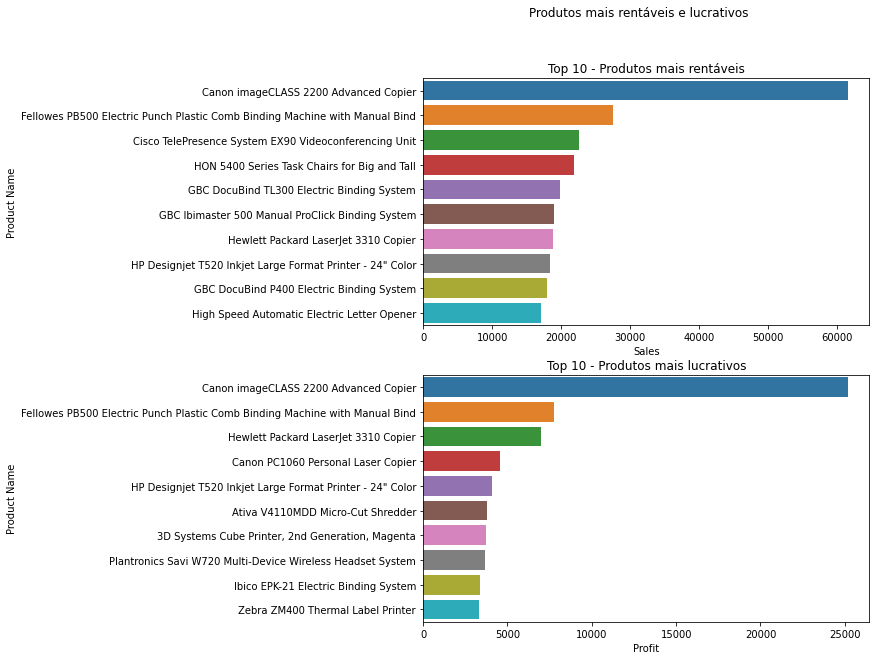

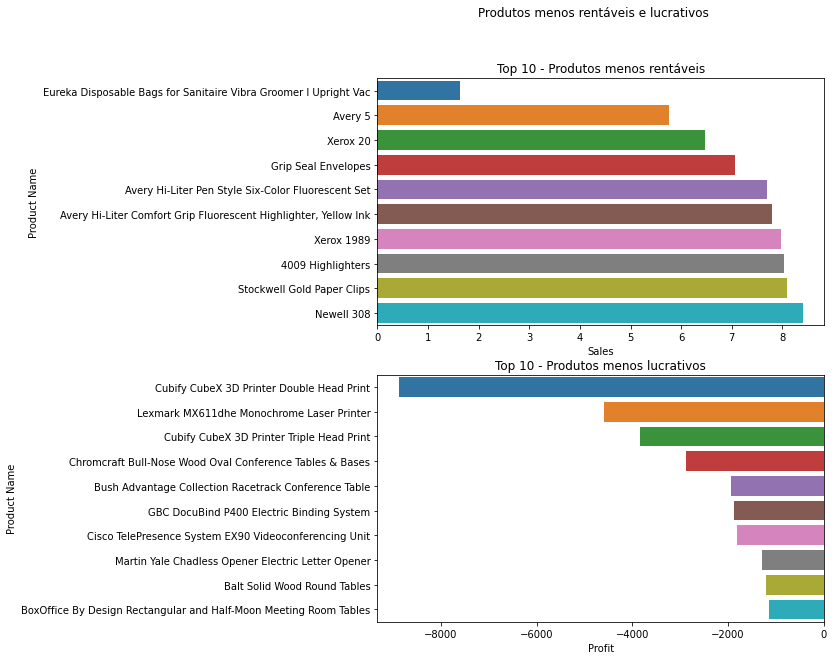

In [5]:
df_product_sales = df_merged_cleaned[['Sales','Profit','Product ID','Product Name']].groupby(['Product ID','Product Name'], as_index=False).sum()

fig, axes = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Produtos mais rentáveis e lucrativos')

df_product_sales_top_10 = df_product_sales.sort_values(by="Sales", ascending=False).head(10)
sns.barplot(ax=axes[0], y='Product Name', x='Sales', data=df_product_sales_top_10)
axes[0].set_title('Top 10 - Produtos mais rentáveis')

df_product_profit_top_10 = df_product_sales.sort_values(by="Profit", ascending=False).head(10)
sns.barplot(ax=axes[1],y='Product Name', x='Profit', data=df_product_profit_top_10)
axes[1].set_title('Top 10 - Produtos mais lucrativos')

fig, axes = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Produtos menos rentáveis e lucrativos')

df_product_sales_top_10 = df_product_sales.sort_values(by="Sales", ascending=True).head(10)
sns.barplot(ax=axes[0], y='Product Name', x='Sales', data=df_product_sales_top_10)
axes[0].set_title('Top 10 - Produtos menos rentáveis')

df_product_profit_top_10 = df_product_sales.sort_values(by="Profit", ascending=True).head(10)
sns.barplot(ax=axes[1],y='Product Name', x='Profit', data=df_product_profit_top_10)
axes[1].set_title('Top 10 - Produtos menos lucrativos')

Cliente

Text(0.5, 1.0, 'Top 10 - Clientes menos lucrativos')

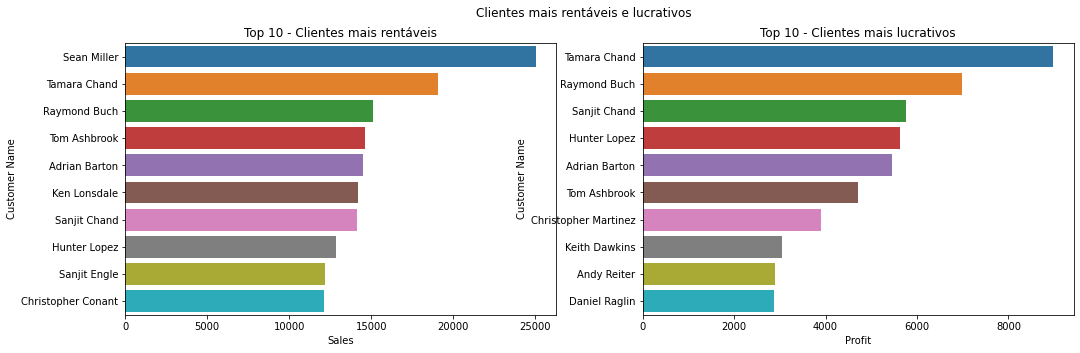

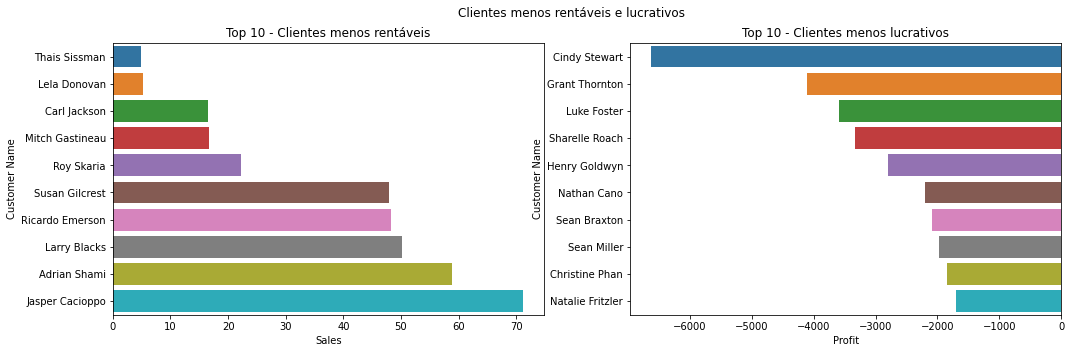

In [6]:
df_customer_sales = df_merged_cleaned[['Sales','Profit','Customer ID','Customer Name']].groupby(['Customer ID','Customer Name'], as_index=False).sum()

fig, axes = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle('Clientes mais rentáveis e lucrativos')

df_customer_sales_top_10 = df_customer_sales.sort_values(by="Sales", ascending=False).head(10)
sns.barplot(ax=axes[0], y='Customer Name', x='Sales', data=df_customer_sales_top_10)
axes[0].set_title('Top 10 - Clientes mais rentáveis')

df_customer_profit_top_10 = df_customer_sales.sort_values(by="Profit", ascending=False).head(10)
sns.barplot(ax=axes[1],y='Customer Name', x='Profit', data=df_customer_profit_top_10)
axes[1].set_title('Top 10 - Clientes mais lucrativos')

fig, axes = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle('Clientes menos rentáveis e lucrativos')

df_customer_sales_top_10 = df_customer_sales.sort_values(by="Sales", ascending=True).head(10)
sns.barplot(ax=axes[0], y='Customer Name', x='Sales', data=df_customer_sales_top_10)
axes[0].set_title('Top 10 - Clientes menos rentáveis')

df_customer_profit_top_10 = df_customer_sales.sort_values(by="Profit", ascending=True).head(10)
sns.barplot(ax=axes[1],y='Customer Name', x='Profit', data=df_customer_profit_top_10)
axes[1].set_title('Top 10 - Clientes menos lucrativos')

# Análises dos pedidos realizados

Região e Estado

Text(0, 0.5, 'Valor total do lucro')

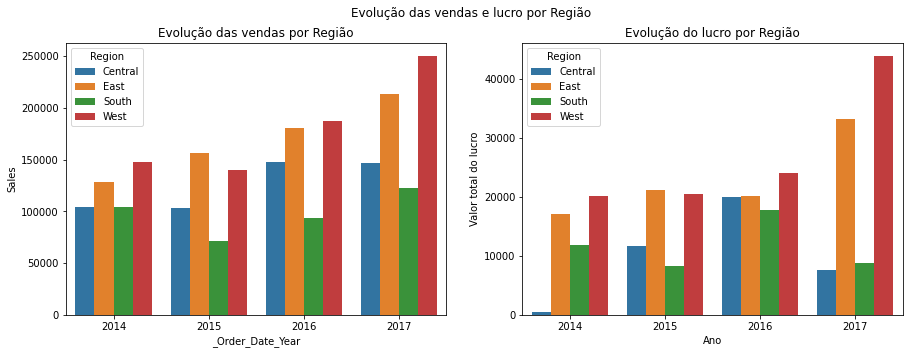

In [7]:
df_region_sales = df_merged_cleaned[['Sales','Profit','Region','State','City','_Order_Date_Year']].groupby(['_Order_Date_Year','Region'], as_index=False).sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Evolução das vendas e lucro por Região')

sns.barplot(ax=axes[0], x='_Order_Date_Year', y='Sales', hue='Region',data=df_region_sales)
axes[0].set_title('Evolução das vendas por Região')
plt.xlabel('Ano')
plt.ylabel('Valor total das vendas')

sns.barplot(ax=axes[1], x='_Order_Date_Year', y='Profit', hue='Region',data=df_region_sales)
axes[1].set_title('Evolução do lucro por Região')
plt.xlabel('Ano')
plt.ylabel('Valor total do lucro')



Text(0.5, 1.0, 'Top 10 - Estados menos lucrativos')

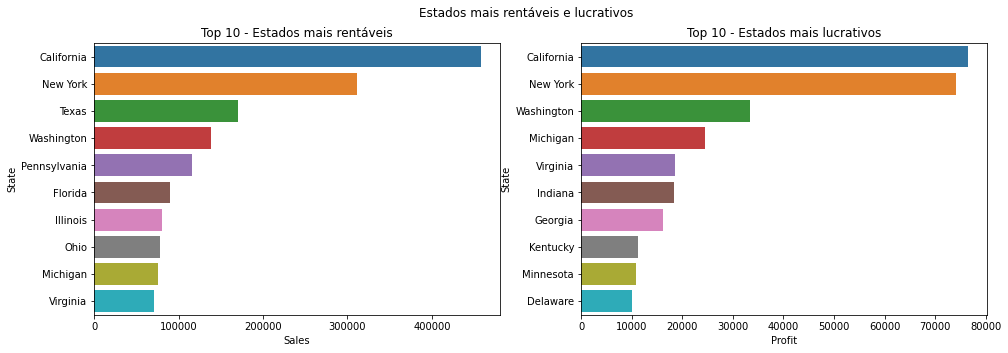

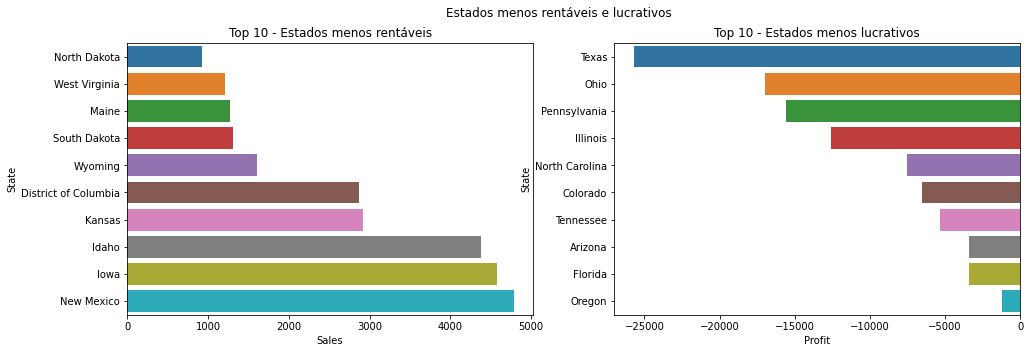

In [8]:
df_state_sales = df_merged_cleaned[['Sales','Profit','State']].groupby(['State'], as_index=False).sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Estados mais rentáveis e lucrativos')

df_state_sales_top_10 = df_state_sales.sort_values(by="Sales", ascending=False).head(10)
sns.barplot(ax=axes[0], y='State', x='Sales', data=df_state_sales_top_10)
axes[0].set_title('Top 10 - Estados mais rentáveis')

df_state_profit_top_10 = df_state_sales.sort_values(by="Profit", ascending=False).head(10)
sns.barplot(ax=axes[1],y='State', x='Profit', data=df_state_profit_top_10)
axes[1].set_title('Top 10 - Estados mais lucrativos')

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Estados menos rentáveis e lucrativos')

df_state_sales_top_10 = df_state_sales.sort_values(by="Sales", ascending=True).head(10)
sns.barplot(ax=axes[0], y='State', x='Sales', data=df_state_sales_top_10)
axes[0].set_title('Top 10 - Estados menos rentáveis')

df_state_profit_top_10 = df_state_sales.sort_values(by="Profit", ascending=True).head(10)
sns.barplot(ax=axes[1],y='State', x='Profit', data=df_state_profit_top_10)
axes[1].set_title('Top 10 - Estados menos lucrativos')

**Observação 5:** Aparentemente, há uma anomalia com relação às vendas de alguns estados. Observe que estados que figuram entre os mais rentáveis, apresentam lucro acentuadamente negativo, figurando também entre os que menos lucraram. É o caso dos estados: Texas, Pennsylvania, Illinois e Ohio. Investigaremos os descontos aplicados nas vendas desses estados.

Top 10 - Desconto médio aplicado pelos estados

             State  Discount
11        Illinois    0.3900
41           Texas    0.3702
36    Pennsylvania    0.3286
33            Ohio    0.3249
4         Colorado    0.3165
1          Arizona    0.3036
8          Florida    0.2993
40       Tennessee    0.2913
35          Oregon    0.2887
31  North Carolina    0.2835


Text(0.5, 1.0, 'Arizona')

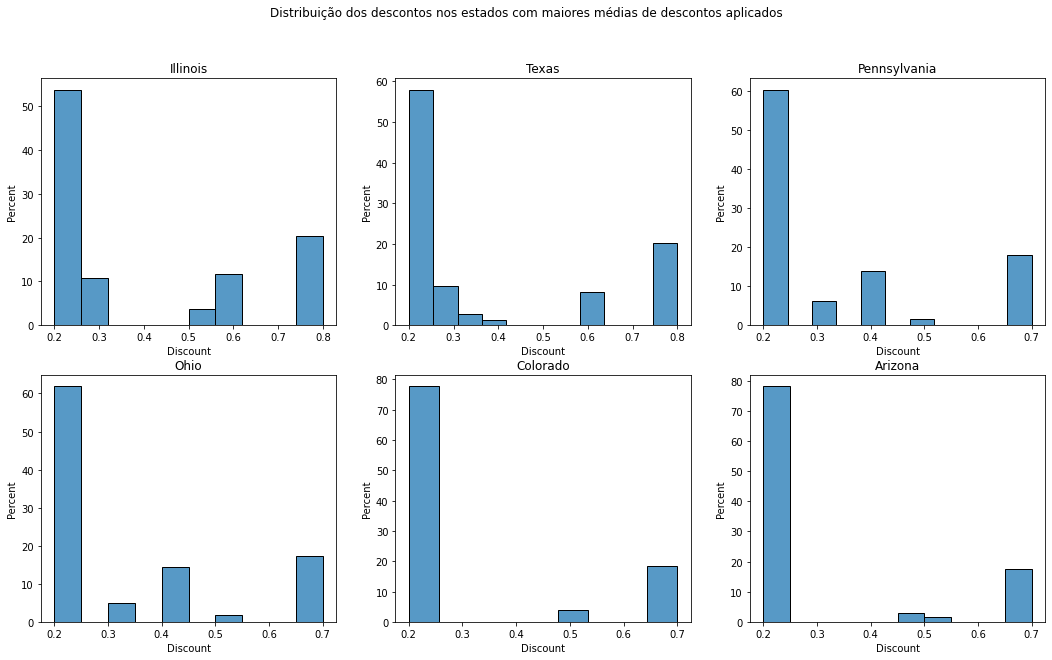

In [9]:
df_state_discount = df_merged_cleaned[['Discount','State']].groupby(['State'], as_index=False).mean()

df_state_discount_top_10 = df_state_discount.sort_values(by="Discount", ascending=False).head(10)

print('Top 10 - Desconto médio aplicado pelos estados\n')
print(df_state_discount_top_10)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Distribuição dos descontos nos estados com maiores médias de descontos aplicados')

sns.histplot(ax=axes[0, 0], stat='percent', data=df_merged_cleaned[df_merged_cleaned['State']=='Illinois'], x='Discount')
axes[0,0].set_title('Illinois')
sns.histplot(ax=axes[0, 1], stat='percent', data=df_merged_cleaned[df_merged_cleaned['State']=='Texas'], x='Discount')
axes[0,1].set_title('Texas')
sns.histplot(ax=axes[0, 2], stat='percent', data=df_merged_cleaned[df_merged_cleaned['State']=='Pennsylvania'], x='Discount')
axes[0,2].set_title('Pennsylvania')
sns.histplot(ax=axes[1, 0], stat='percent', data=df_merged_cleaned[df_merged_cleaned['State']=='Ohio'], x='Discount')
axes[1,0].set_title('Ohio')
sns.histplot(ax=axes[1, 1], stat='percent', data=df_merged_cleaned[df_merged_cleaned['State']=='Arizona'], x='Discount')
axes[1,1].set_title('Colorado')
sns.histplot(ax=axes[1, 2], stat='percent', data=df_merged_cleaned[df_merged_cleaned['State']=='Florida'], x='Discount')
axes[1,2].set_title('Arizona')

**Hipótese 2:** Conforme já informado na Observação 5, temos uma grande aplicação de descontos principalmente nos estados: Illinois, Texas, Pennsylvania, Ohio, Colorado e Arizona.

Categorias

Text(0, 0.5, 'Valor total do lucro')

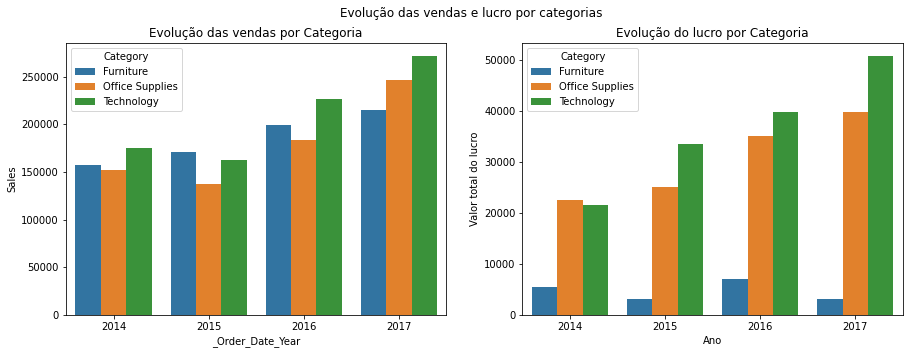

In [10]:
df_category_sales = df_merged_cleaned[['Sales','Profit','Category','_Order_Date_Year']].groupby(['_Order_Date_Year','Category'], as_index=False).sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Evolução das vendas e lucro por categorias')

sns.barplot(ax=axes[0], x='_Order_Date_Year', y='Sales', hue='Category',data=df_category_sales)
axes[0].set_title('Evolução das vendas por Categoria')
plt.xlabel('Ano')
plt.ylabel('Valor total das vendas')

sns.barplot(ax=axes[1], x='_Order_Date_Year', y='Profit', hue='Category',data=df_category_sales)
axes[1].set_title('Evolução do lucro por Categoria')
plt.xlabel('Ano')
plt.ylabel('Valor total do lucro')

# Conclusão

Observamos que os os descontos aplicados nas vendas em alguns estados encontram-se, provavelmente, em desconformidade com os objetivos de lucro da empresa. Deverá ser revisitada a política de descontos e analisado as regras para aplicação dos mesmos.